# I. Lý thuyết

Đây là bảng confusion matrix của một mô hình phân loại nhị phân

![](https://imgur.com/1UZL68u.png)

Hãy cho biết:

1.- Đâu là công thức đúng của _Sensitivity (độ nhạy)_ ?

A. TP/(TP + FP)

B. TP/(TP + FN)

C. TP/(TN + FN)

D. TP/(TN + FP)

2.- Ý nghĩa của _Sensitivity (độ nhạy)_ trong mô hình chuẩn đoán bệnh?

A. Sensitivity cho biết nếu một người mắc bệnh thật thì mô hình có thể nhận biết được mắc bệnh với xác suất là bao nhiêu phần trăm ?

B. Sensitivity cho biết nếu mô hình chuẩn đoán một người mắc bệnh thì người đó có khả năng bị mắc bệnh thật là bao nhiêu phần trăm ?

C. Sensitivity cho biết nếu một người không bị mắc bệnh thì mô hình có thể nhận biết được người đó không mắc bệnh với xác suất bao nhiêu phần trăm ?

D. Sensitivity cho biết trong số những trường hợp không bị mắc bệnh thì mô hình có thể nhận biết được là bao nhiêu phần trăm ?

Có ba mô hình với cùng accuracy như sau. 

![](https://imgur.com/zXUy6zd.png)

![](https://imgur.com/0GBEf8v.png)

![](https://imgur.com/t5I6f4y.png)

3.- Mô hình nào sẽ được lựa chọn?

A. Mô hình 1

B. Mô hình 2

C. Mô hình 3

D. Cả ba mô hình đều như nhau.

4.- f1-score của cả ba mô hình là lần lượt là:

A. m1: 0.571; m2: 0.675; m3: 0.75

B. m1: 0.75; m2: 0.675; m3: 0.889

C. m1: 0.571; m2: 0.75; m3: 0.889

D. không có đáp án nào đúng.

5.- Một mô hình phân loại ngẫu nhiên sẽ có đường ROC như thế nào ?

A. Lồi lên phía trên.

B. Tiệm cận đường chéo nét đứt.

C. Lõm xuống phía dưới.

D. Có dạng hình sin.



1.   **B**
2.   **A**

3.   **C**
4.   **C**

5.   **A (SAI)** 








# II. Thực hành

Một mô hình phân loại nhị phân có giá trị dự báo `y_hat` và giá trị ground truth `y` lần lượt như sau:

In [25]:
import numpy as np

y     = np.array([1, 0, 1, 1, 0,
                  1, 0, 0, 1, 0])
y_hat = np.array([0.8, 0.1, 0.85, 0.2, 0.4, 
                  0.7, 0.25, 0.05, 0.6, 0.1])

6. Nếu ngưỡng phân loại `threshold = 0.5`. Viết hàm tính 3 giá trị: `precision, recall, f1-score`


7. Nếu ngưỡng phân loại là threshold = 0.5. Viết hàm tính giá trị: sensitivity, specificity.


In [75]:
def calculate_metrics(y,y_hat):
  TP, FP, TN, FN = 0, 0, 0, 0
  for i in range(len(y_hat)):
    if (y_hat[i] <= 0.5) & (y[i] == 0):
      TN += 1
    elif (y_hat[i] <= 0.5) & (y[i] == 1):
      FN += 1
    elif (y_hat[i] >= 0.5) & (y[i] == 1):
      TP += 1
    else:
      FP += 1
  
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  f1_score = 2 / (1/precision + 1/recall)
  sensitivity = TP / (TP + FN)
  specificity = TN / (FP + TN)

  return print(f'precision:',precision, '\n','recall:',recall,'\n','f1-score:',f1_score,'\n','sensetivity:',sensitivity,'\n','specificity',specificity)

In [76]:
calculate_metrics(y, y_hat)

precision: 1.0 
 recall: 0.8 
 f1-score: 0.8888888888888888 
 sensetivity: 0.8 
 specificity 1.0


8. Vẽ biểu đồ đường cong ROC. Khi threshold thay đổi từ `[0, 1]` với steps là 0.05

In [38]:
import matplotlib.pyplot as plt
threshold = np.arange(0 ,1, 0.05)
threshold

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [82]:
fpr = []
tpr = []

positive = sum(y)
negative = len(y) - positive

for i in threshold:
  FP, TP = 0, 0
  for j in range(len(y_hat)):
    if y_hat[j] >= i :
      if y[j] == 1:
        TP += 1
      else:
        FP += 1
  fpr.append(FP/negative)
  tpr.append(TP/positive)

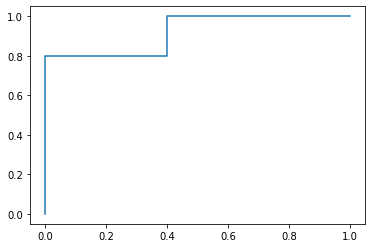

In [83]:
plt.plot(fpr,tpr)

9. Vẽ biểu đồ biểu diễn giá trị của `precision, recall` trên đồ thị khi threshold thay đổi từ `[0, 1]` với steps là 0.05.

In [91]:
pre = []
rec = []

for i in threshold:
  FP, TP, FN = 0, 0, 0
  i = round(i,2)
  for j in range(len(y_hat)):
    if y_hat[j] >= i :
      if y[j] == 1:
        TP += 1
      else:
        FP += 1
    else:
      if y[j] == 1:
        FN += 1
  print(TP/(FP+TP))

0.5
0.5
0.5555555555555556
0.7142857142857143
0.7142857142857143
0.6666666666666666
0.8
0.8
0.8
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


ZeroDivisionError: ignored

10. Viết hàm tính diện tích AUC của mô hình.